<a href="https://colab.research.google.com/github/qowogks123/-breast-cancer-detection/blob/main/EDA_breast_cancer_jh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Custom Colors Palette: 


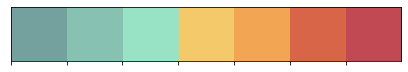

In [ ]:
from IPython.display import clear_output, display_html
import os
import warnings
from pathlib import Path

# Basic libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm

# Set Color Palettes for the notebook
'''Inspired by: https://www.kaggle.com/code/andradaolteanu/rsna-fracture-detection-dicom-images-explore'''
custom_colors = ['#74a09e','#86c1b2','#98e2c6','#f3c969','#f2a553', '#d96548', '#c14953']
print('Custom Colors Palette: ')
sns.palplot(sns.color_palette(custom_colors))

import scipy as sc
from scipy import stats

# Train Test Split
from sklearn.model_selection import train_test_split

# Cross Validation
from sklearn.model_selection import KFold, cross_val_score, StratifiedKFold, learning_curve, train_test_split

# Tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Plotly
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import plotly.offline as offline
import plotly.graph_objs as go

warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# CSV Data

* site_id - 병원의 ID 코드입니다.
* patient_id - 환자의 ID 코드입니다.
* image_id - 이미지의 ID 코드입니다.
* laterality - 이미지가 왼쪽 유방인지 오른쪽 유방인지 여부.
* view - 이미지의 방향입니다. 스크리닝 검사의 기본값은 유방당 두개의 보기를          캡처하는 것입니다.
* age - 환자의 나이
* implant - 환자가 유방 이식 수술을 받았는지에 대한 여부.
사이트 1은 유방 수준이 아닌 환자 수준에서만 유방 삽입정보를 제공
* density - 유방 조직의 밀도에 대한 등급으로, A는 가장 밀도가 낮고 D는 가             장 밀도가 높습니다.극도로 조밀한 조직은 진단을 더 어렵게 만들             수 있다. train에만 제공됩니다.
* machine_id - 이미지 장치의 ID코드입니다.
* cancer - 유방이 악성 암에 양성이었는지 여부, 목표값입니다. train에만제공
* biopsy - 유방에 대한 추적 생검 시행 여부, train에만 제공됩니다.
* invasive - 유방이 암에 양성이면, 암이 침습적인 것으로 판명되었는지 여부train 데이터에만 제공 
* BIRADS - 유방이 추적 관찰이 필요한 경우0, 암에 대해 음성으로 평가된 경우1, 유방이 정상으로 평가된 경우 2, train 데이터에만 제공
* prediction_id - 일치하는 제출 행의 ID입니다. 여러 이미지가 동일한 예측 ID를 공유합니다. test 전용
* difficult_negative_case - 만약 그 사건이 비정상적으로 어려웠다면 사실                             이다. train에만 제공됩니다.

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/파이널 프로젝트/data1/train.csv')
test = pd.read_csv('/content/drive/MyDrive/파이널 프로젝트/data1/test.csv')
sample_sub = pd.read_csv('/content/drive/MyDrive/파이널 프로젝트/data1/sample_submission.csv')

In [ ]:
train

,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case
0,2,10006,462822612,L,CC,61.0,0,0,0,NaN,0,NaN,29,False
1,2,10006,1459541791,L,MLO,61.0,0,0,0,NaN,0,NaN,29,False
2,2,10006,1864590858,R,MLO,61.0,0,0,0,NaN,0,NaN,29,False
3,2,10006,1874946579,R,CC,61.0,0,0,0,NaN,0,NaN,29,False
4,2,10011,220375232,L,CC,55.0,0,0,0,0.0,0,NaN,21,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54701,1,9973,1729524723,R,MLO,43.0,0,0,0,1.0,0,C,49,False
54702,1,9989,63473691,L,MLO,60.0,0,0,0,NaN,0,C,216,False
54703,1,9989,1078943060,L,CC,60.0,0,0,0,NaN,0,C,216,False
54704,1,9989,398038886,R,MLO,60.0,0,0,0,0.0,0,C,216,True


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54706 entries, 0 to 54705
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   site_id                  54706 non-null  int64  
 1   patient_id               54706 non-null  int64  
 2   image_id                 54706 non-null  int64  
 3   laterality               54706 non-null  object 
 4   view                     54706 non-null  object 
 5   age                      54669 non-null  float64
 6   cancer                   54706 non-null  int64  
 7   biopsy                   54706 non-null  int64  
 8   invasive                 54706 non-null  int64  
 9   BIRADS                   26286 non-null  float64
 10  implant                  54706 non-null  int64  
 11  density                  29470 non-null  object 
 12  machine_id               54706 non-null  int64  
 13  difficult_negative_case  54706 non-null  bool   
dtypes: bool(1), float64(2)

In [ ]:
test

,site_id,patient_id,image_id,laterality,view,age,implant,machine_id,prediction_id
0,2,10008,736471439,L,MLO,81,0,21,10008_L
1,2,10008,1591370361,L,CC,81,0,21,10008_L
2,2,10008,68070693,R,MLO,81,0,21,10008_R
3,2,10008,361203119,R,CC,81,0,21,10008_R


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   site_id        4 non-null      int64 
 1   patient_id     4 non-null      int64 
 2   image_id       4 non-null      int64 
 3   laterality     4 non-null      object
 4   view           4 non-null      object
 5   age            4 non-null      int64 
 6   implant        4 non-null      int64 
 7   machine_id     4 non-null      int64 
 8   prediction_id  4 non-null      object
dtypes: int64(6), object(3)
memory usage: 416.0+ bytes


In [ ]:
print("-- Training data --")
print(": Train set shape           = {:,d} rows x {:d} columns".format(train.shape[0], train.shape[1]))
print(": Number of unique images   = {:,d}".format(train["image_id"].nunique()))
print(": Number of unique patients = {:,d}".format(train["patient_id"].nunique()))
print(": Number of unique views    = {:d}".format(train["view"].nunique()))
print(": Number of unique sites    = {:d}".format(train["site_id"].nunique()))
print(": Number of unique machines = {:,d}".format(train["machine_id"].nunique()))
print()
print("-- Testing data --")
print(": Test  set shape           = {:,d} rows x {:d} columns".format(test.shape[0], test.shape[1]))
print(": Number of unique images   = {:,d}".format(test["image_id"].nunique()))
print(": Number of unique patients = {:,d}".format(test["patient_id"].nunique()))
print(": Number of unique views    = {:d}".format(test["view"].nunique()))
print(": Number of unique sites    = {:d}".format(test["site_id"].nunique()))
print(": Number of unique machines = {:,d}".format(test["machine_id"].nunique()))

-- Training data --
: Train set shape           = 54,706 rows x 14 columns
: Number of unique images   = 54,706
: Number of unique patients = 11,913
: Number of unique views    = 6
: Number of unique sites    = 2
: Number of unique machines = 10

-- Testing data --
: Test  set shape           = 4 rows x 9 columns
: Number of unique images   = 4
: Number of unique patients = 1
: Number of unique views    = 2
: Number of unique sites    = 1
: Number of unique machines = 1


In [ ]:
sample_sub

,prediction_id,cancer
0,10008_L,0.021168
1,10008_R,0.021168


In [ ]:
def check_duplicate(df):
    if df.duplicated().all():
        return '제거해야 할 데이터 프레임에 중복된 데이터가 있습니다'
    else :
        return '중복 데이터 발견되지 않음'

In [ ]:
check_duplicate(train)

'중복 데이터 발견되지 않음'

In [ ]:
train.isnull().sum().sort_values(ascending=False)

BIRADS                     28420
density                    25236
age                           37
site_id                        0
patient_id                     0
image_id                       0
laterality                     0
view                           0
cancer                         0
biopsy                         0
invasive                       0
implant                        0
machine_id                     0
difficult_negative_case        0
dtype: int64

In [ ]:
test.isnull().sum().sort_values(ascending=False)

site_id          0
patient_id       0
image_id         0
laterality       0
view             0
age              0
implant          0
machine_id       0
prediction_id    0
dtype: int64

 Insight

 - train 데이터는 총 54706개의 데이터가 있고 11913명의 환자에 대한 데이터
 - test 데이터는 환자 한명에 대한 데이터 인 듯 
 - test 데이터에 없는 열이 train 데이터에 있고, 없는 열 중 일부는 암과 관련이 있는 것 같음 ->['biopsy','invasive','BIRADS','difficult_negative_case','density']
 - test 데이터에는 훈련 데이터에 존재하지 않은 prediction_id열을 포함 
 - train 데이터에 결측치 존재, test데이터에는 결측치 없음
 - train데이터와 test데이터에 중복인 데이터 존재하지는 않음
 - submission을 보면 환자의 왼쪽과 오른쪽의 유방암을 예측하는 확률을 예측하는것

There are 11913 unique patients in the Train Set.

Minimum number of entries are: 4 
Maximum number of entries are: 14



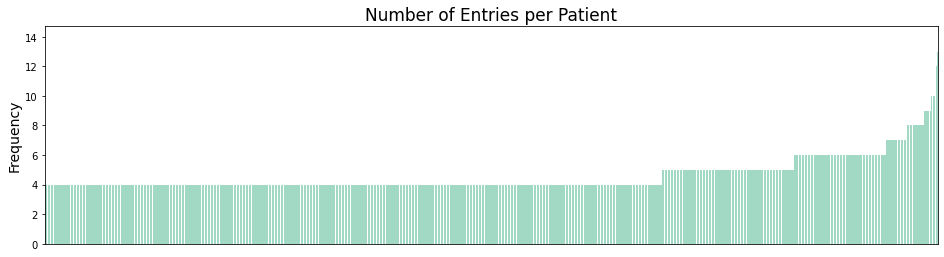

In [ ]:
print('There are {} unique patients in the Train Set.'.format(len(train['patient_id'].unique())))

data = train.groupby(by="patient_id")['laterality'].count().reset_index(drop=False)
data = data.sort_values(['laterality']).reset_index(drop=True)

print("\nMinimum number of entries are: {}".format(data["laterality"].min()), "\n" +
      "Maximum number of entries are: {}\n".format(data["laterality"].max()))

plt.figure(figsize = (16, 4))
img = sns.barplot(data.index, data['laterality'], color=custom_colors[2])
plt.title("Number of Entries per Patient", fontsize = 17)
plt.ylabel('Frequency', fontsize=14)
img.axes.get_xaxis().set_visible(False)

Insight

 - 대부분의 환자는 4개의 이미지를 갖고 있지만 그것 보다 더 많은 이미지를 가지고 있는 환자들도 있습니다.

# Age

In [ ]:
def numerical_plotting(df, col, title, symb):
    fig, ax = plt.subplots(2, 1, sharex=True, figsize=(8,5),gridspec_kw={"height_ratios": (.2, .8)})
    ax[0].set_title(title,fontsize=18)
    sns.boxplot(x=col, data=df, ax=ax[0])
    ax[0].set(yticks=[])
    sns.distplot(df[col],kde=True)
    plt.xticks(rotation=45)
    ax[1].set_xlabel(col, fontsize=16)
    plt.axvline(df[col].mean(), color='darkgreen', linewidth=2.2, label='mean=' + str(np.round(df[col].mean(),1)) + symb)
    plt.axvline(df[col].median(), color='red', linewidth=2.2, label='median='+ str(np.round(df[col].median(),1)) + symb)
    plt.axvline(df[col].mode()[0], color='purple', linewidth=2.2, label='mode='+ str(df[col].mode()[0]) + symb)
    plt.legend(bbox_to_anchor=(1, 1.03), ncol=1, fontsize=17, fancybox=True, shadow=True, frameon=True)
    plt.tight_layout()
    plt.show()   

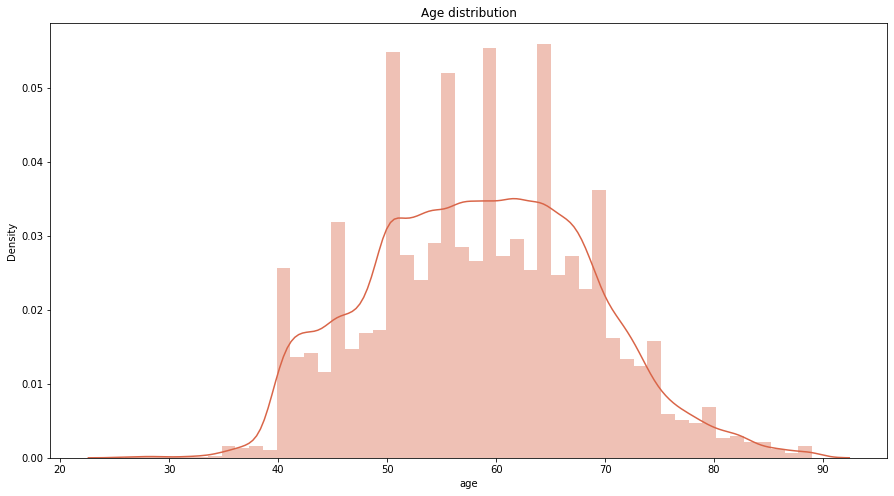

In [ ]:
plt.figure(figsize=(15,8))

sns.distplot(train.age, color = custom_colors[5])
plt.title('Age distribution')
plt.show()

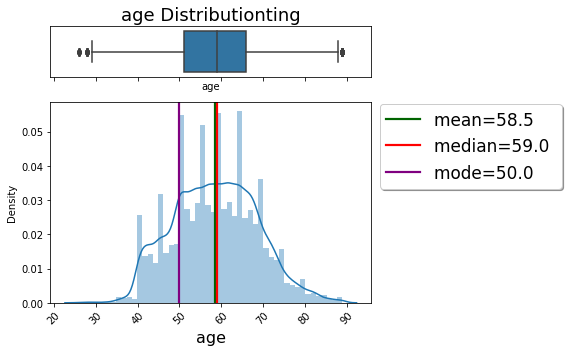

In [ ]:
numerical_plotting(train,'age','age Distributionting',' ')

[Text(0.5, 1.0, 'Distribution of age variable')]

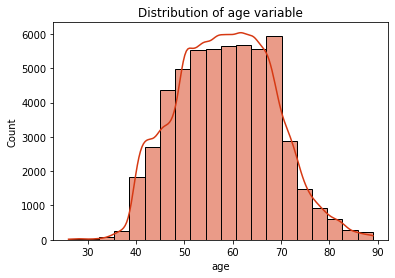

In [ ]:
sns.histplot( x = train["age"], bins = 20, kde = True, color = "#D63913").set(title = "Distribution of age variable")

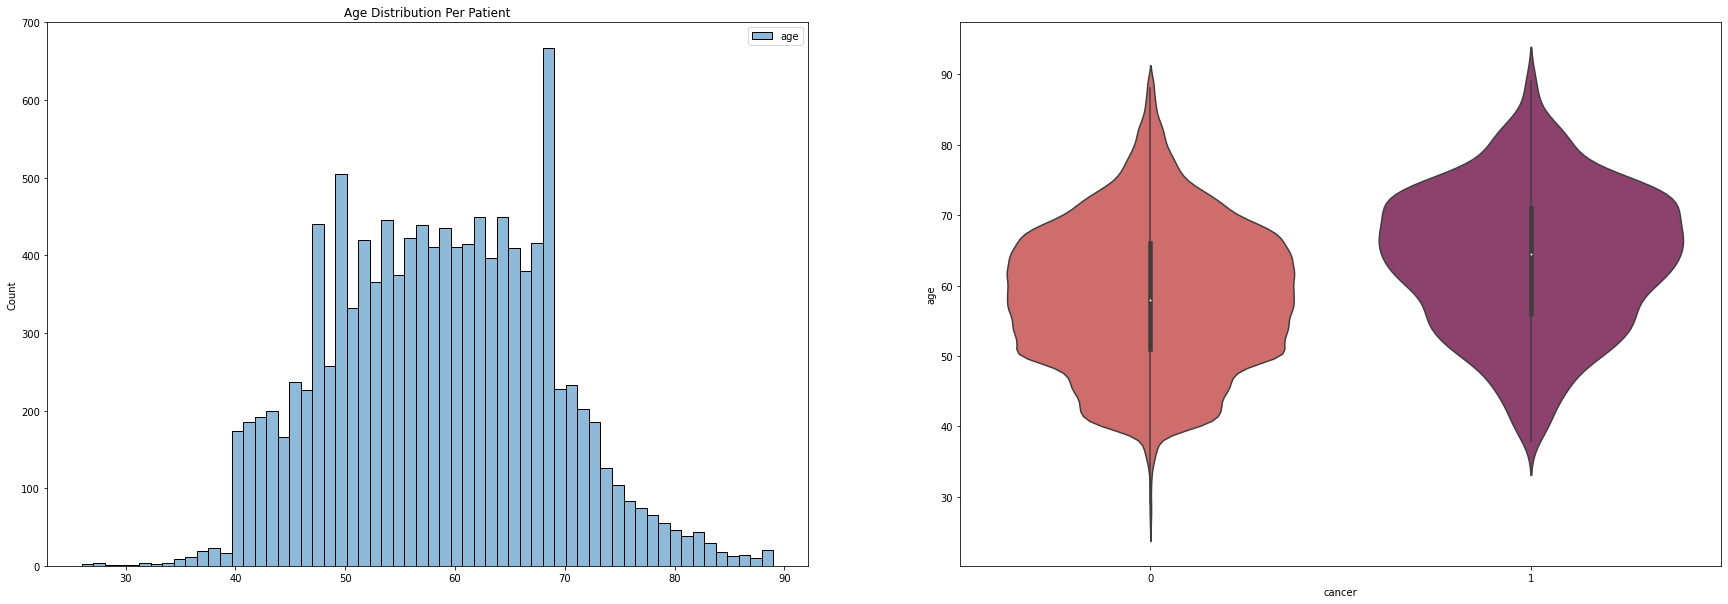

In [ ]:
agePerPatient=train.groupby('patient_id').agg({'age': lambda age:age.unique()}) 
fig, ax = plt.subplots(1,2,figsize=(30,10))
sns.histplot(agePerPatient, color='#D63913', bins=60, ax=ax[0])
ax[0].set_title('Age Distribution Per Patient');
sns.violinplot(train.cancer, train.age, ax=ax[1],palette='flare')

In [ ]:
train['age'].value_counts().sort_values(ascending=False).head(20)

50.0    2248
62.0    2038
64.0    2011
54.0    2004
57.0    1964
59.0    1961
52.0    1885
61.0    1883
56.0    1877
67.0    1876
60.0    1858
65.0    1847
58.0    1829
63.0    1752
55.0    1708
66.0    1702
53.0    1654
68.0    1576
51.0    1534
69.0    1460
Name: age, dtype: int64

Insight - age

- 환자는 40세 미만은 거의 없고, 대부분 50, 60대가 많습니다, 그리고 70세이후부터감소세
- 암에 걸린 환자는 확실히 암에 걸리지 않은 환자보다 나이대가 많은 것 같습니다.

# Cancer

In [ ]:
def categorical_plotting(df,col,title):
    fig, ax = plt.subplots(figsize=(10,5))
    ax=sns.countplot(x=col, data=df, palette='flare', order = df[col].value_counts().index)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    plt.title(title)
    plt.show()

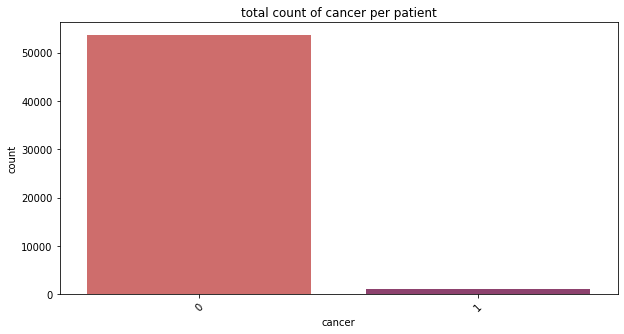

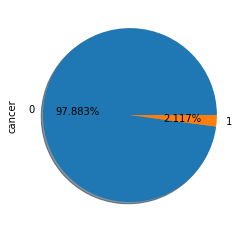

In [ ]:
categorical_plotting(train,'cancer','total count of cancer per patient')
train["cancer"].value_counts().plot.pie( autopct='%1.3f%%', shadow = True)

Insight - cancer

 - 유방암이 양성인 데이터와 음성인 데이터와의 차이가 극심

# BIRADS
 - 1. 유방에 후속 조치가 필요한 경우 : 0
 - 2. 유방이 암에 대해 음성으로 평가된 경우 : 1
 - 3. 유방이 정상으로 평가된 경우 : 2

Text(0.5, 1.0, 'BIRADS Score Counts')

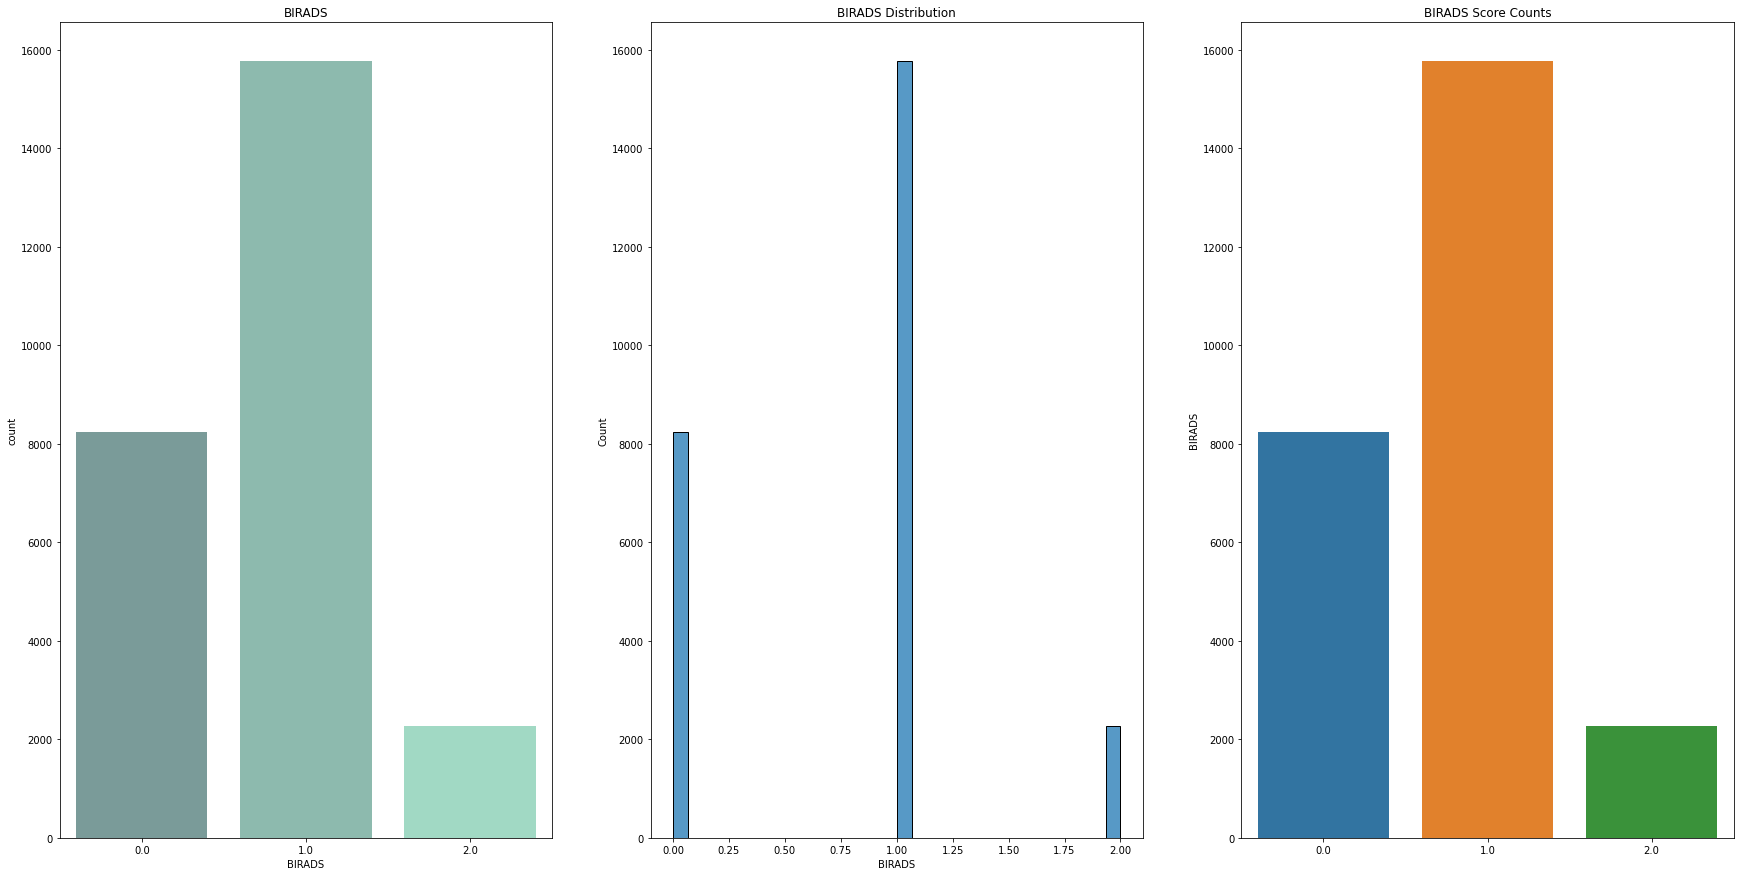

In [ ]:
fig, axes = plt.subplots( nrows = 1, ncols =3, figsize = (30,15))

sns.countplot(train.BIRADS, ax = axes[0], palette = custom_colors)
axes[0].set_title('BIRADS')
sns.histplot(train, x='BIRADS', ax = axes[1])
axes[1].set_title('BIRADS Distribution')
counts = pd.DataFrame(train['BIRADS'].value_counts()).rename(index={"0.0" : "0", "1.0":"1","2.0":"0"})
sns.barplot(x=counts.index, y=counts.BIRADS, ax = axes[2])
axes[2].set_title('BIRADS Score Counts')


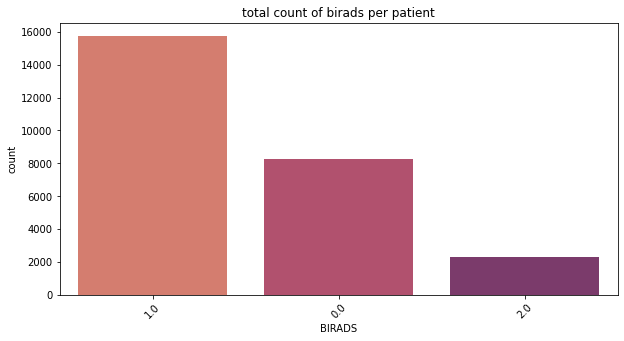

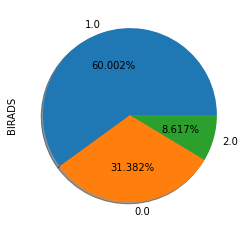

In [ ]:
categorical_plotting(train,'BIRADS','total count of birads per patient')
train["BIRADS"].value_counts().plot.pie( autopct='%1.3f%%', shadow = True)

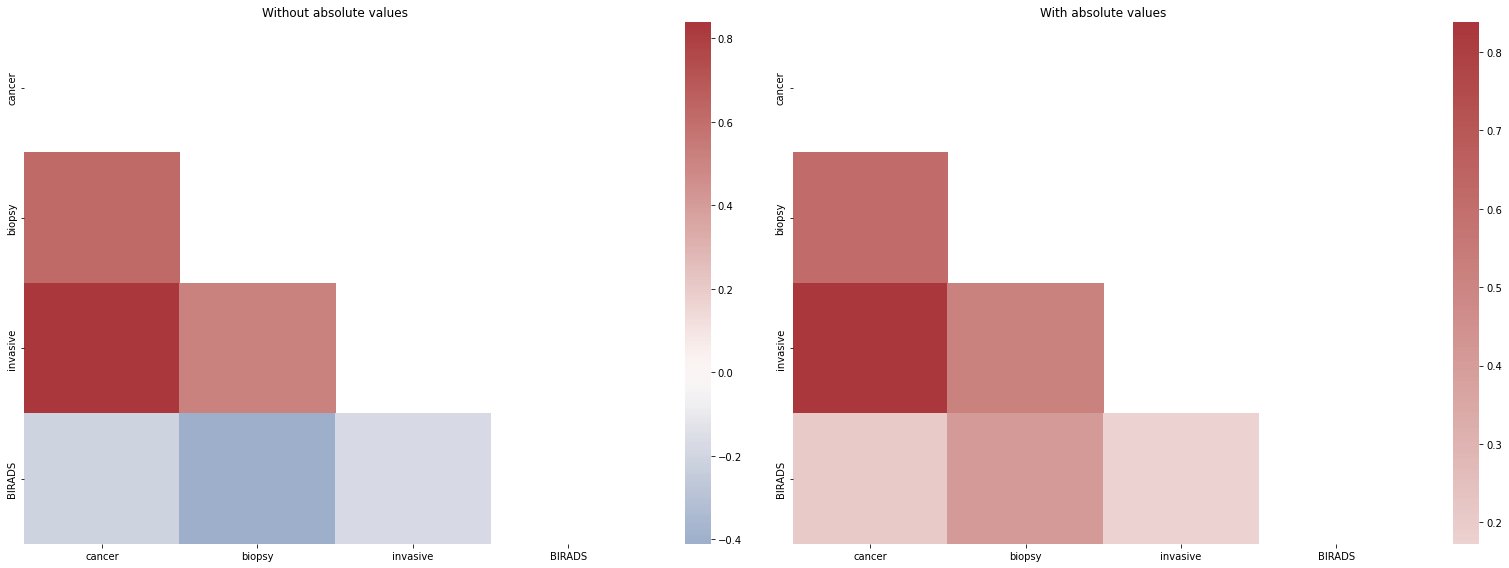

In [ ]:
corr= train[['cancer','biopsy','invasive','BIRADS']].corr()
# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(corr)

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (22,8))
# Heatmap without absolute values
sns.heatmap(corr, mask=matrix, center = 0, cmap = 'vlag', ax = axes[0]).set_title('Without absolute values')
# Heatmap with absolute values
sns.heatmap(abs(corr), mask=matrix, center = 0, cmap = 'vlag', ax = axes[1]).set_title('With absolute values')

fig.tight_layout(h_pad=1.0, w_pad=0.5)

Insight - BIRADS

 - BIRADS는 나머지 피처와 음의 상관관계를 갖는다.
 - BIRADS또한 클래스간의 균형이 맞지 않는다. 

# View

view - 이미지의 방향입니다. 스크리닝 검사의 기본값은 유방당 두개의 보기를 캡처하는 것입니다.
크게 두 그룹으로 나눌 수 있는 수많은 유방 조영술 보기가 있음.
 1. 표준 보기
 2. 보충 보기
['CC', 'MLO', 'ML', 'LM', 'AT', 'LMO']

 [1]. 표준 보기
 - 일상적인 선별 유방 조영술을 구성
 - 금기 사항이 없는 한, 유방 x선 사진을 선별하는 것은 이 4가지 견해로 구성
 - 40세 미만의 환자의 경우 방사선 노출을 제한하기 위해 2가지 MLO뷰만 수행

1.1 CC

 - 양측 두개꼬리
 - 선별 유방 조영술의 두 가지 표준 투영 중 하나
 - 가능한 한 유방의 내측 부분과 외부 측면 부분을 보여 주어야 함
 - 가슴 근육 및 프로필의 젖꼭지와 유방의 외부 측면 부분(유방 뒤 공간), 가슴 근막 뒤쪽과 표면 근막의 깊은층 사이

1.2 MLO 
 
 - 중측 복사근
 - 두개꼬리 보기와 함께 두 가지 표준 유방 조영술 보기 중 하나입니다.
 - 대부분의 유방 조직을 묘사 할 수 있기 때문에 가장 중요한 투영입니다.
 - MLO 보기를 수행하면 추가 노출 없이 추가 조직을 얻을 수 있습니다.

 [2] . 추가 보기

 2.1 ML 
 - 중외측
 - 보충 유방 조영술 보기이며 MLO보다 유방 조직과 가슴 근육이 적습니다.
 - 유방을 위쪽으로 들어올리고 압축을 가하여 젖꼭지가 옆으로 오도록합니다.
 - 최적의 중간 측면보기는 가슴 근육, 하부 각도 및 젖꼭지를 프로파일에서 보여주고 유방 조직의 대부분을 표시해야합니다.
 2.2 LM
 - 측측보기
 - 내측 유방이 필름에 가장 가깝도록 합니다., 내측 유방을 보다 신중하게 평가할 수 있게 합니다.
 2.3 LMO - 측면-내측 복사근(LMO)
 - 일종의 보조 유방 조영술 보기
 - 장점은 CC 뷰에서만 볼 수 있는 먼 중후방 병변을 묘사하거나 유방 조영술에서 볼 수 없는 내부 사분면의 만져지는 병변을 묘사
 - 고전적인 MLO 보기에서는 볼 수 없는 병변을 입증하는 데에 도 도움이 될 수 있습니다.

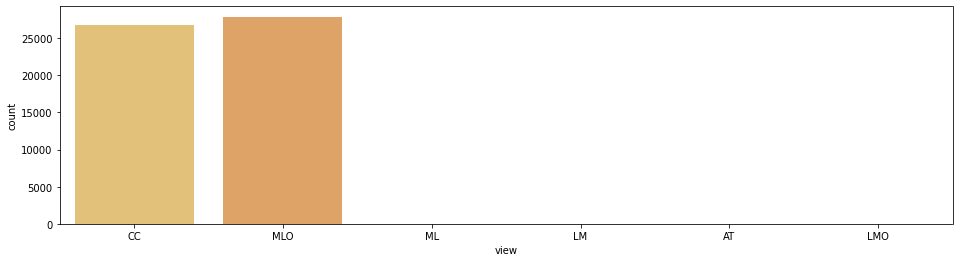

In [ ]:
plt.figure(figsize=(16,4))
sns.countplot(train.view , palette= custom_colors[3:])
plt.show()

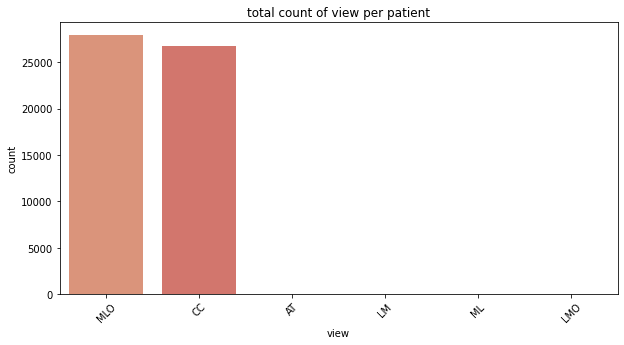

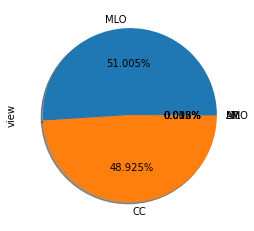

In [ ]:
categorical_plotting(train,'view','total count of view per patient')
train["view"].value_counts().plot.pie( autopct='%1.3f%%', shadow = True)

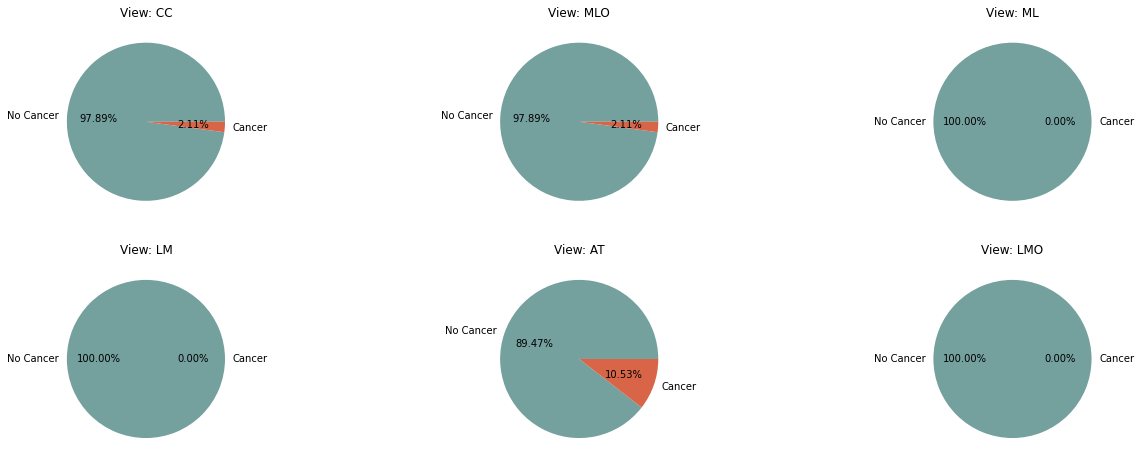

In [ ]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (22, 8))
for i, val in enumerate(train.view.unique()):
    dt = [train[(train.view == val) & (train.cancer == c)].shape[0] for c in [0,1]]
    axes[i // 3, i % 3].pie(dt, labels = ['No Cancer','Cancer'], colors=[custom_colors[0], 
                            custom_colors[5]], autopct='%.2f%%')
    axes[i // 3, i % 3].set_title('View: {}'.format(val))

Insight - view 

 - view feature의 class를 보면 MLO와 CC가 대부분인데 가장 일반적인 검사기 때문에 많은 것 같습니다.
 - View가 CC와 MLO 그리고 AT에서 Cancer가 존재하였는데, AT에서 Cancer가 많이 존재 하였습니다. 

# Invasive - 유방이 암에 양성이면, 암이 침습적인 것으로 판명되었는지에 대한 여부

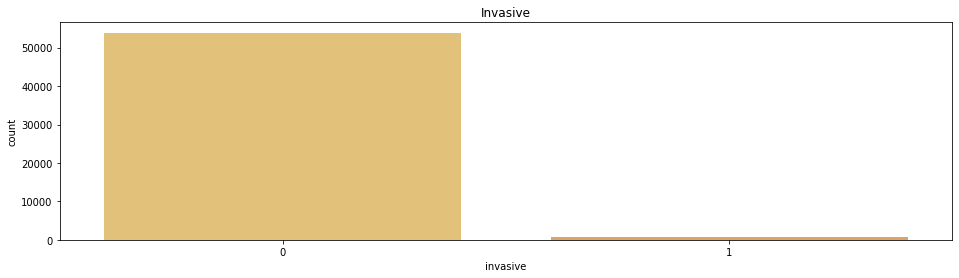

In [ ]:
plt.figure(figsize=(16,4))
sns.countplot(train.invasive, palette= custom_colors[3:])
plt.title('Invasive')
plt.show()

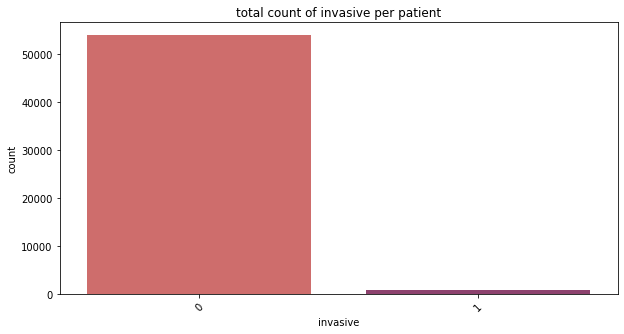

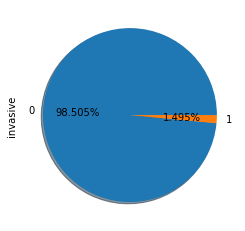

In [ ]:
categorical_plotting(train,'invasive','total count of invasive per patient')
train["invasive"].value_counts().plot.pie( autopct='%1.3f%%', shadow = True)

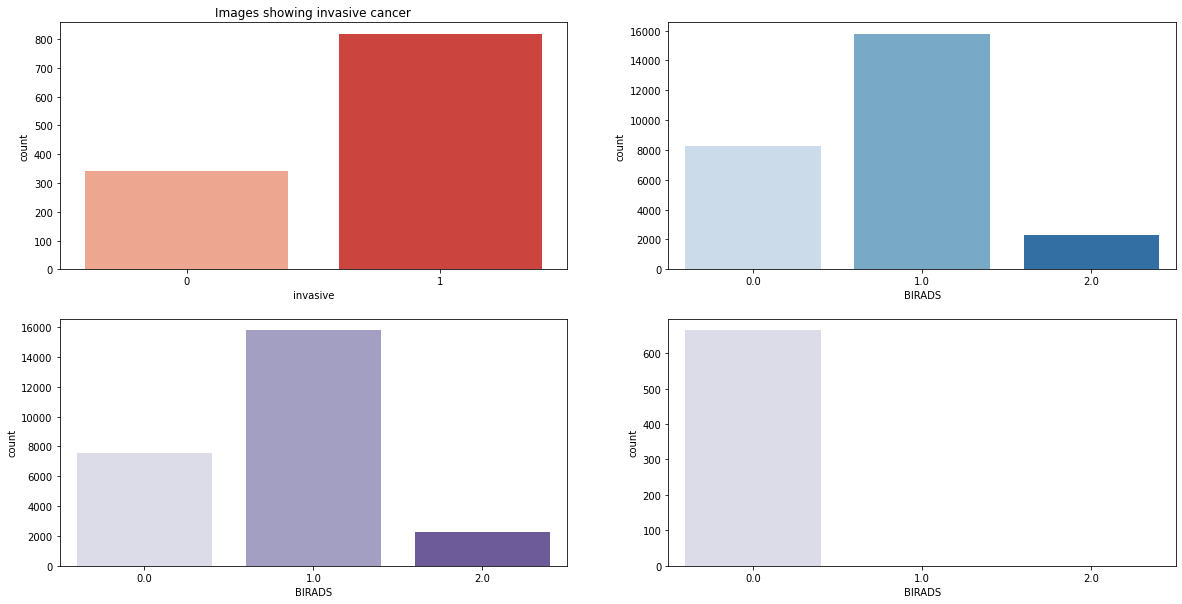

In [ ]:
fig, ax = plt.subplots(2,2,figsize=(20,10))
sns.countplot(train[train.cancer==1].invasive, ax=ax[0,0], palette='Reds')
sns.countplot(train.BIRADS, order=[0., 1., 2.], ax=ax[0,1], palette='Blues')
ax[0,0].set_title('Images showing invasive cancer');

sns.countplot(train[train.cancer==0].BIRADS, order=[0., 1., 2.], ax=ax[1,0], palette='Purples')
sns.countplot(train[train.cancer==1].BIRADS, order=[0., 1., 2.], ax=ax[1,1], palette='Purples')

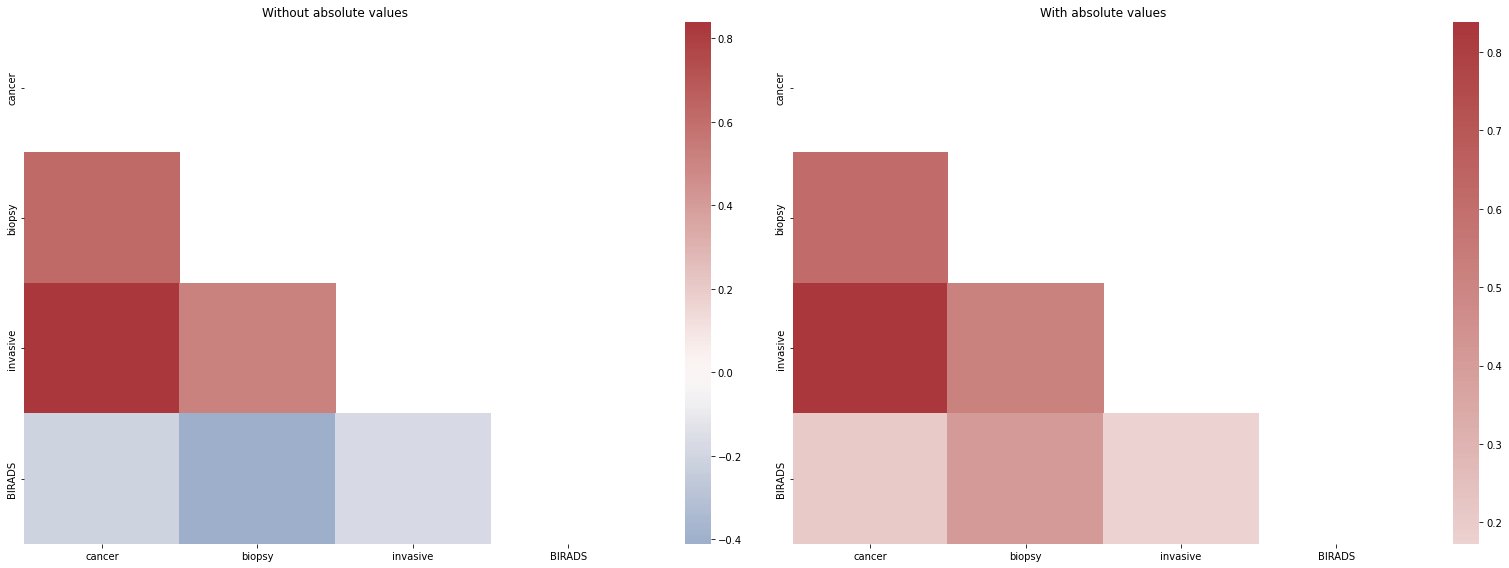

In [ ]:
corr= train[['cancer','biopsy','invasive','BIRADS']].corr()
# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(corr)

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (22,8))
# Heatmap without absolute values
sns.heatmap(corr, mask=matrix, center = 0, cmap = 'vlag', ax = axes[0]).set_title('Without absolute values')
# Heatmap with absolute values
sns.heatmap(abs(corr), mask=matrix, center = 0, cmap = 'vlag', ax = axes[1]).set_title('With absolute values')

fig.tight_layout(h_pad=1.0, w_pad=0.5)

In [ ]:
train[train.cancer==1].invasive.value_counts() / train[train.cancer==1].shape[0]

1    0.70639
0    0.29361
Name: invasive, dtype: float64

insight - invasive

 - Invasive와 cancer간의 상관성이 높다 
 - 암의 70%가 다른 조직으로 확산 
 - class 불균형

# Density - 밀도

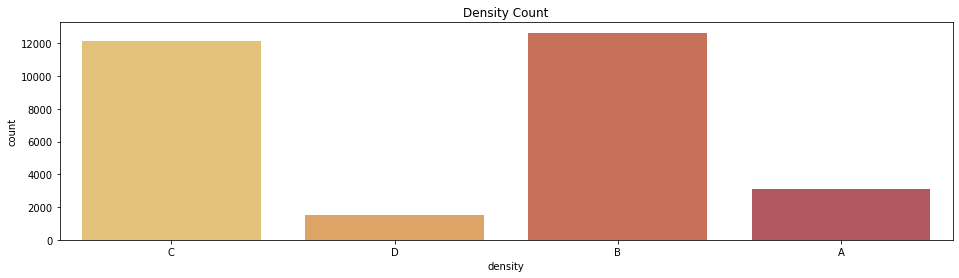

In [ ]:
plt.figure(figsize=(16,4))
sns.countplot(train.density, palette= custom_colors[3:])
plt.title('Density Count')
plt.show()

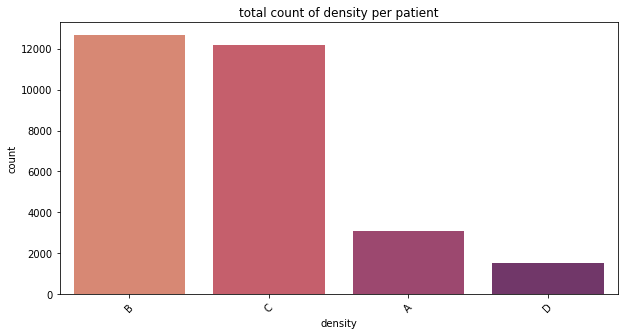

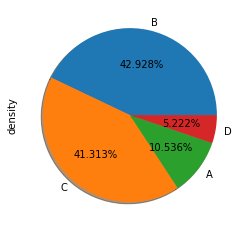

In [ ]:
categorical_plotting(train,'density','total count of density per patient')
train["density"].value_counts().plot.pie( autopct='%1.3f%%', shadow = True)

Insight - density

 - 4가지 유형이 있으며 B와 C가 대부분 
 - 고밀도 조직은 진단을 더 어렵게 만들 수 있다고 합니다.

# laterality - 이미지가 왼쪽 유방인지 오른쪽 유방인지

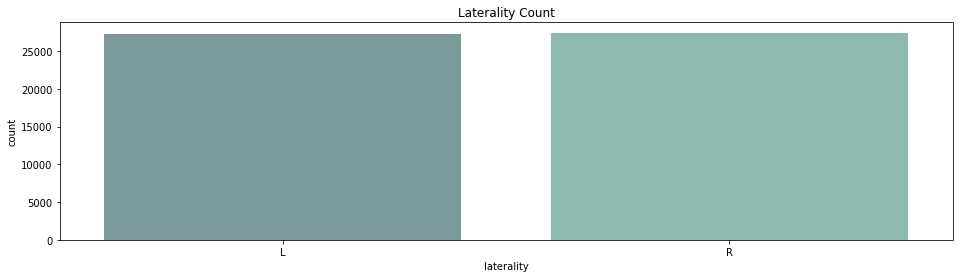

In [ ]:
plt.figure(figsize=(16,4))
sns.countplot(train.laterality, palette= custom_colors)
plt.title('Laterality Count')
plt.show()

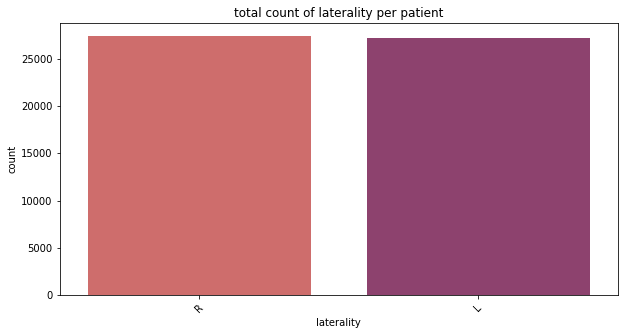

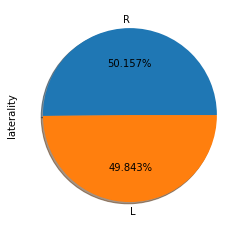

In [ ]:
categorical_plotting(train,'laterality','total count of laterality per patient')
train["laterality"].value_counts().plot.pie( autopct='%1.3f%%', shadow = True)

 Insight - laterality
  - class가 어느정도 balanced 되어 있음


In [ ]:
train.columns

Index(['site_id', 'patient_id', 'image_id', 'laterality', 'view', 'age',
       'cancer', 'biopsy', 'invasive', 'BIRADS', 'implant', 'density',
       'machine_id', 'difficult_negative_case'],
      dtype='object')

# Biopsy - 유방에 대한 생검 여부

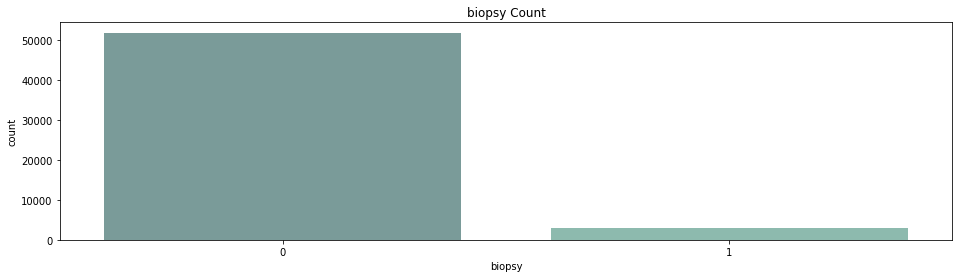

In [ ]:
plt.figure(figsize=(16,4))
sns.countplot(train.biopsy, palette= custom_colors)
plt.title('biopsy Count')
plt.show()

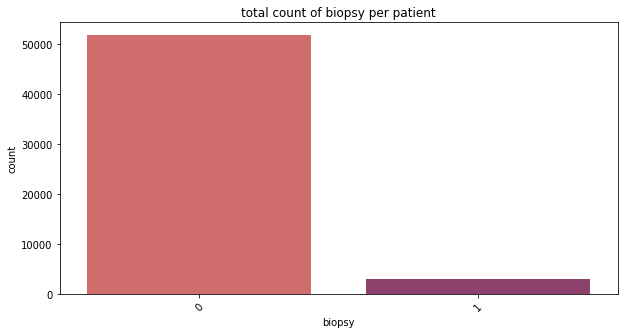

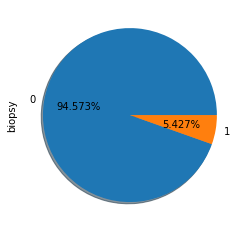

In [ ]:
categorical_plotting(train,'biopsy','total count of biopsy per patient')
train["biopsy"].value_counts().plot.pie( autopct='%1.3f%%', shadow = True)

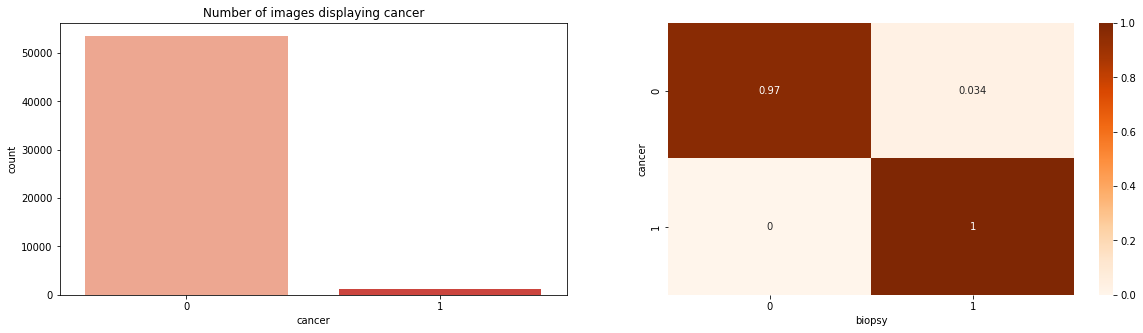

In [ ]:
biopsy_counts = train.groupby('cancer').biopsy.value_counts().unstack().fillna(0) 
biopsy_perc = biopsy_counts.transpose() / biopsy_counts.sum(axis=1)
fig, ax = plt.subplots(1,2,figsize=(20,5))
sns.countplot(train.cancer, palette='Reds', ax=ax[0])
ax[0].set_title('Number of images displaying cancer');
sns.heatmap(biopsy_perc.transpose(), ax=ax[1], annot=True, cmap='Oranges')

In [ ]:
for b in [0,1]: 
    print('Biopsy: {}'.format('Not Performed' if b == 0 else 'Performed'))
    for c in [0,1]: 
        dt = [train[(train.biopsy == b) & (train.cancer == c)].shape[0] for c in [0,1]]
        print('\tPatients with{}diagnosed cancer: {}'.format(' no ' if c == 0 else ' ', dt[c]))

Biopsy: Not Performed
	Patients with no diagnosed cancer: 51737
	Patients with diagnosed cancer: 0
Biopsy: Performed
	Patients with no diagnosed cancer: 1811
	Patients with diagnosed cancer: 1158


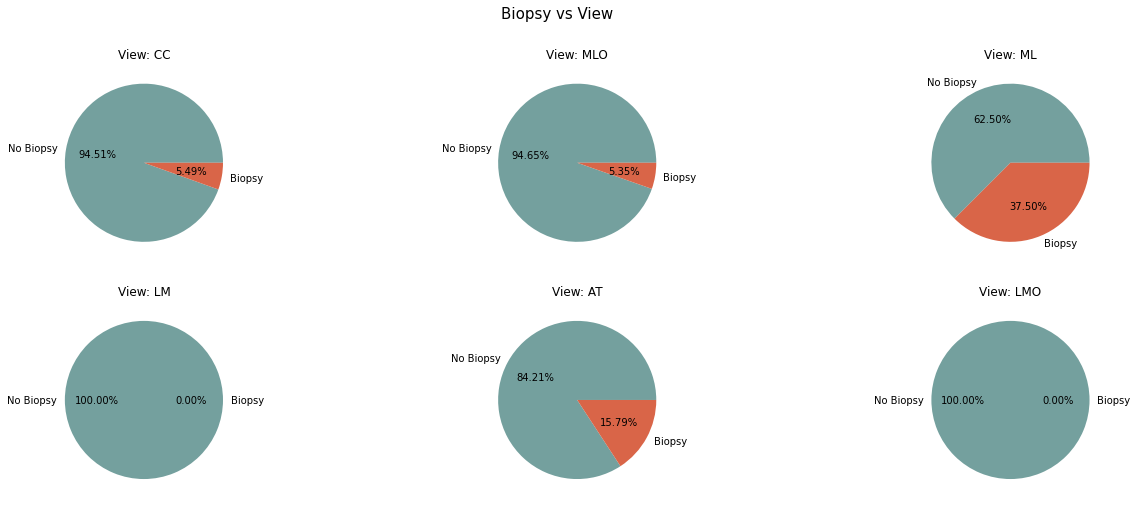

In [ ]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (22, 8))
fig.suptitle('Biopsy vs View', fontsize = 15)
for i, val in enumerate(train.view.unique()):
    dt = [train[(train.view == val) & (train.biopsy == c)].shape[0] for c in [0,1]]
    axes[i // 3, i % 3].pie(dt, labels = ['No Biopsy','Biopsy'], colors=[custom_colors[0], 
                            custom_colors[5]], autopct='%.2f%%')
    axes[i // 3, i % 3].set_title('View: {}'.format(val))

 Insight - Biopsy

  - 생검이란 확실한 진단을 위하여 생체에서 조직의 일부를 떼어 내어 현미경으로 검사한 것입니다.
  - 암 환자들은 모두 조직검사를 받았다고 볼 수 있고, 암이 없는 환자들의 0.03%만 조직검사를 하였습니다. 

# implant - 환자가 유방 이식 수술을 받았는지에 대한 여부



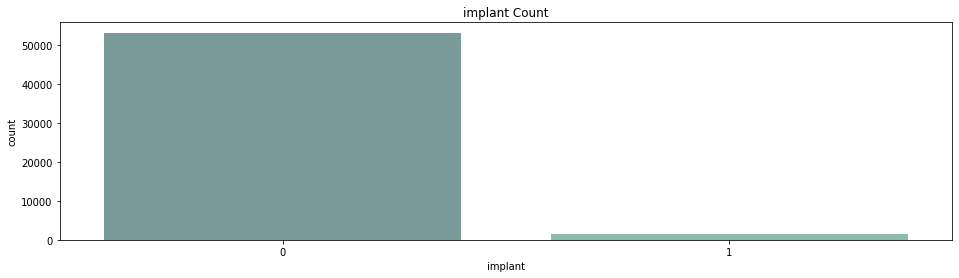

In [ ]:
plt.figure(figsize=(16,4))
sns.countplot(train.implant, palette= custom_colors)
plt.title('implant Count')
plt.show()

In [ ]:
for b in [0,1]: 
    print('implant: {}'.format('Not implant' if b == 0 else 'Performed'))
    for c in [0,1]: 
        dt = [train[(train.implant == b) & (train.cancer == c)].shape[0] for c in [0,1]]
        print('\tPatients with{} cancer: {}'.format(' no ' if c == 0 else ' ', dt[c]))

implant: Not implant
	Patients with no  cancer: 52084
	Patients with  cancer: 1145
implant: Performed
	Patients with no  cancer: 1464
	Patients with  cancer: 13


Insight - implant

 - implant 여부에 따라 암은 거의 상관이 없는 것 같습니다.(이식 수술을 해도 암은 걸린다)

# difficult_negative_Case - 암인지 판단이 어려움

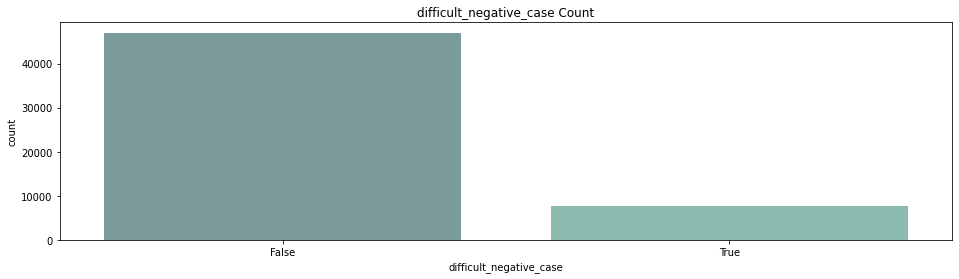

In [ ]:
plt.figure(figsize=(16,4))
sns.countplot(train.difficult_negative_case, palette= custom_colors)
plt.title('difficult_negative_case Count')
plt.show()

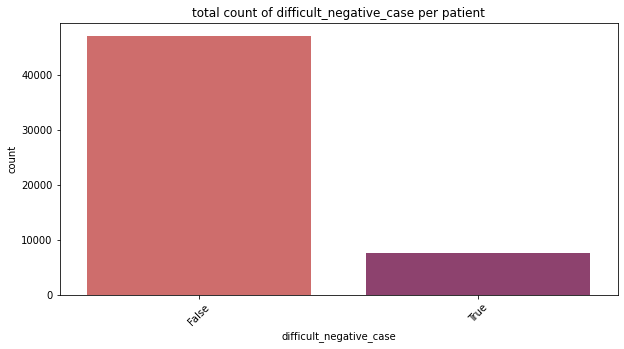

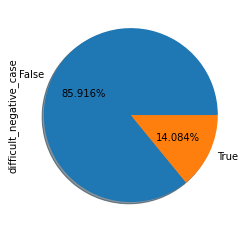

In [ ]:
categorical_plotting(train,'difficult_negative_case','total count of difficult_negative_case per patient')
train["difficult_negative_case"].value_counts().plot.pie( autopct='%1.3f%%', shadow = True)

# Machine_id

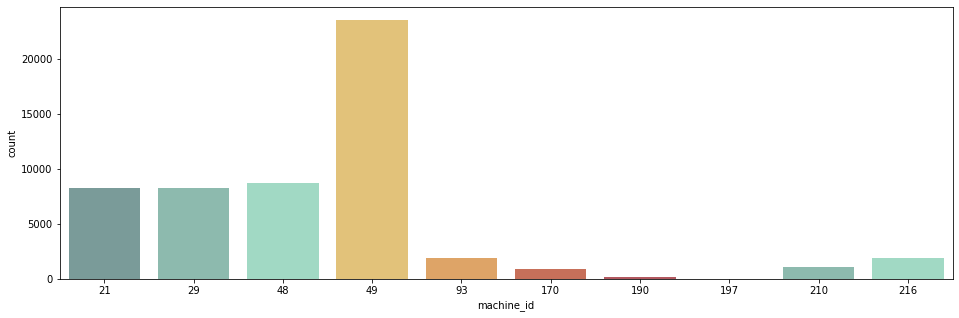

In [ ]:
# Machine ID
fig = plt.figure(figsize = (16,5))
sns.countplot(train.machine_id, palette = custom_colors)

Insight - Machine_id 
 
 - 대부분의 사진이 49번의 기계로 찍혔던 것 말고는 없음
 - 중요하지 않은 feature 같음


# Image 에 대한 분석 

## Dicom image 

 - DICOM 이미지는 단일 파일로 포장된 헤더 및 이미지 데이터 세트를 단일 파일로 구성됩니다.
 - 헤더 내의 정보는 일정한 태그의 상수 및 표준화된 시리즈로 구성이 됩니다.

In [ ]:
!pip install pydicom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 27.2 MB/s eta 0:00:00


In [ ]:
from os import listdir
import cv2

In [ ]:
import pydicom
import numpy as np
from pydicom.pixel_data_handlers.util import apply_voi_lut
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path
import glob

In [ ]:
example = '/content/drive/MyDrive/파이널 프로젝트/data1/train_images/10006/1459541791.dcm'
pydicom.dcmread(example)

Dataset.file_meta -------------------------------
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Digital X-Ray Image Storage - For Presentation
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.840.10009.1.2.3.10006.1.1459541791
(0002, 0010) Transfer Syntax UID                 UI: JPEG 2000 Image Compression (Lossless Only)
(0002, 0012) Implementation Class UID            UI: 1.2.840.113654.2.3.1995.2.12.0
(0002, 0013) Implementation Version Name         SH: 'PYDICOM 2.3.0'
-------------------------------------------------
(0008, 0018) SOP Instance UID                    UI: 1.2.840.10009.1.2.3.10006.1.1459541791
(0008, 0023) Content Date                        DA: '20221118'
(0008, 0033) Content Time                        TM: '183901.792591'
(0010, 0020) Patient ID                          LO: '10006'
(0020, 000d) Study Instance UID                  UI: 1.2.840.10009.1.2.3.10006
(0020, 000e) Series Instance

 - Rows와 Columns 값은 이미지 크기를 나타냅니다.
 - Pixel Spacing 과 Slice Thickness는 픽셀 크기와 두께를 나타냅니다.
 - Window Center와 Window Width는 이미지의 밝기와 대조에 대한 정보를 제공합니다.
 - 픽셀값의 범위는 Rescale Intercept와 Rescale Slope에 따라 결정됩니다.
 - ImagePositionPatient(영상 위치 환자)는 각 영상의 왼쪽 상단 모서리의 x,y및 z좌표를 mm 단위로 알려줍니다

In [ ]:
def rescale_img_to_hu(dcm_ds):
  data = dcm_ds.pixel_array
  if dcm_ds.PhotometricInterpretation == "MONOCHROME1":
    data = np.amax(data) - data
  return data * dcm_ds.RescaleSlope + dcm_ds.RescaleIntercept

In [ ]:
def show_images_for_patient(patient_id):
    patient_dir = os.path.join('/content/drive/MyDrive/파이널 프로젝트/data1/train_images', str(patient_id))
    num_images = len(glob.glob(f"{patient_dir}/*"))
    print(f"Number of images for patient: {num_images}")
    fig, axs = plt.subplots(2,2, figsize=(24,15))
    axs = axs.flatten()
    for i, img_path in enumerate(list(Path(patient_dir).iterdir())):
        ds = pydicom.dcmread(img_path)
        axs[i].imshow(rescale_img_to_hu(ds), cmap="bone")

Number of images for patient: 4


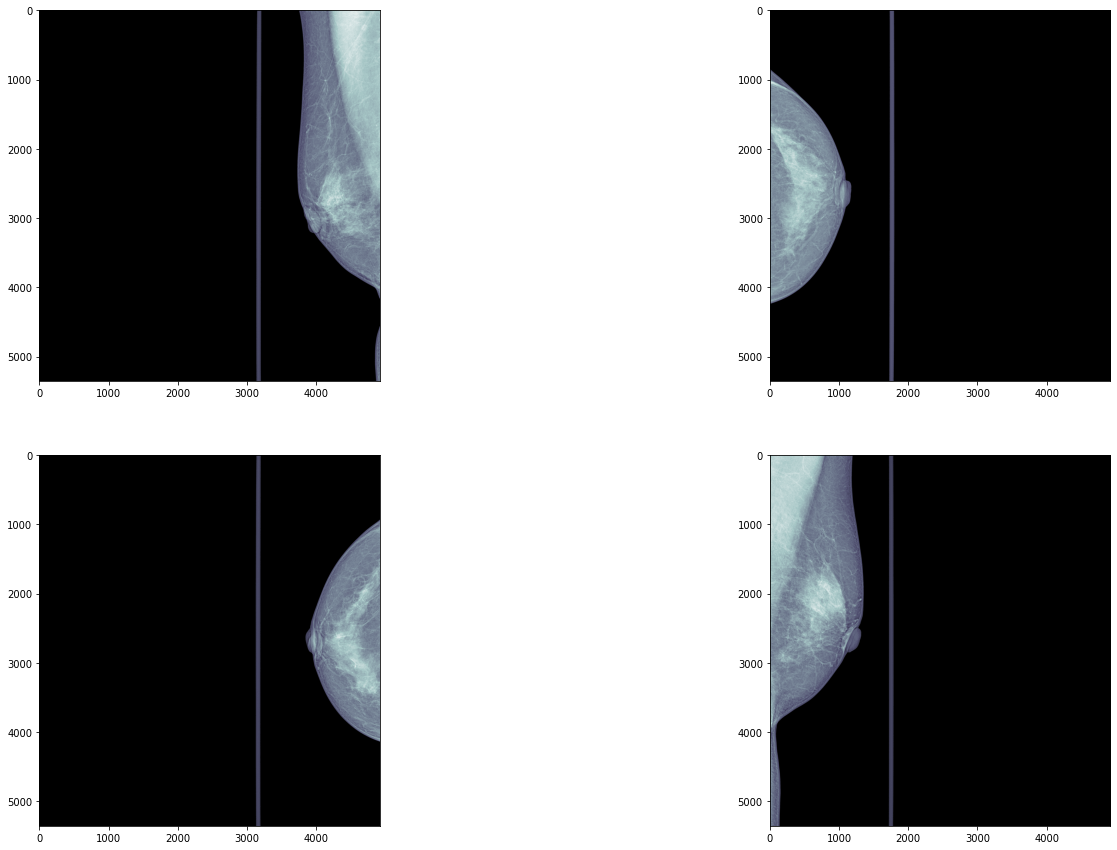

In [ ]:
# 유방암이 아닌 환자
show_images_for_patient(10006)

Number of images for patient: 4


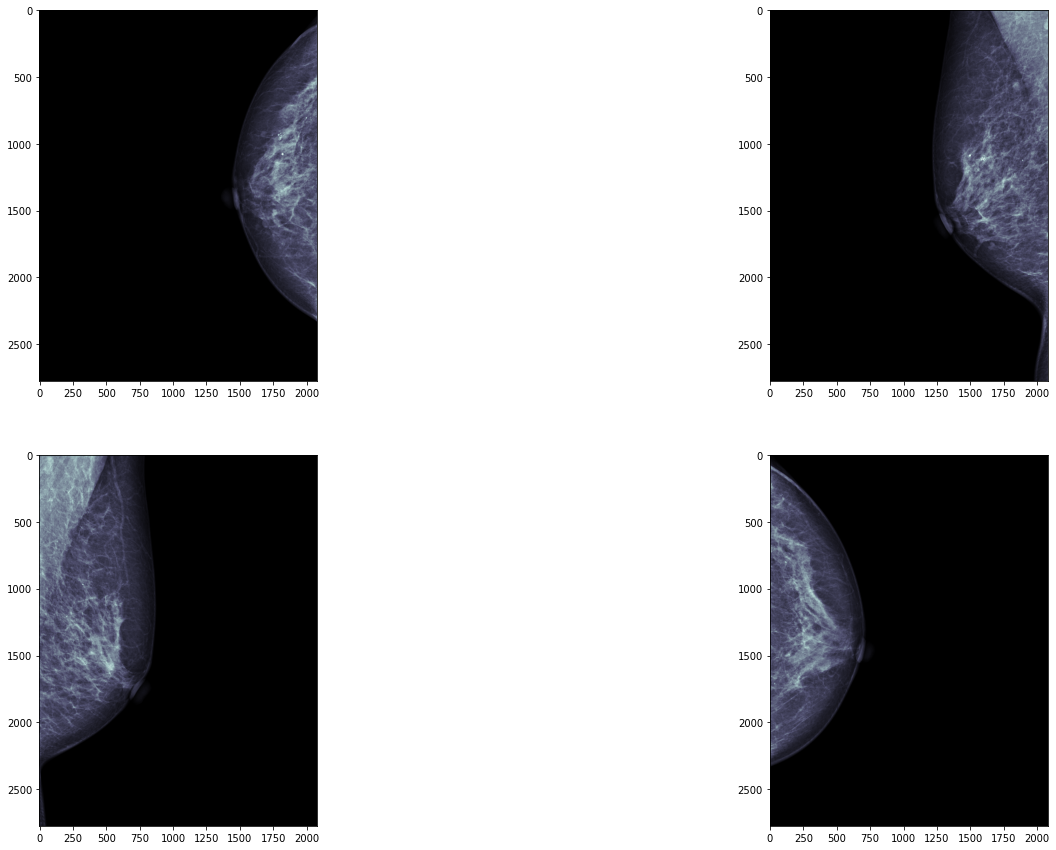

In [ ]:
# 유방암인 환자
show_images_for_patient(9707)

In [ ]:
dcms = []
for root, dirs, fnames in os.walk('/content/drive/MyDrive/파이널 프로젝트/data1/train_images/'):
  dcms += list(os.path.join(root, f) for f in fnames if f.endswith('.dcm'))

print(f'{len(dcms)} images')

attrs = set()
for fname in tqdm(dcms[:5000]):
  with pydicom.dcmread(fname) as obj:
    attrs.update(obj.dir())
dcm_keys = list(attrs)
dcm_keys.remove('PixelData')
dcm_keys


54705 images


100%|██████████| 5000/5000 [46:14<00:00,  1.80it/s]


['PixelIntensityRelationshipSign',
 'InstanceNumber',
 'StudyInstanceUID',
 'BitsStored',
 'WindowWidth',
 'SOPInstanceUID',
 'SeriesInstanceUID',
 'ImageLaterality',
 'HighBit',
 'CompressionForce',
 'WindowCenter',
 'LossyImageCompression',
 'PixelPaddingValue',
 'RescaleIntercept',
 'PartialView',
 'PatientID',
 'PixelRepresentation',
 'PhotometricInterpretation',
 'PixelSpacing',
 'BodyPartThickness',
 'VOILUTFunction',
 'RescaleSlope',
 'SamplesPerPixel',
 'PixelIntensityRelationship',
 'Rows',
 'Columns',
 'ExposureControlModeDescription',
 'ContentDate',
 'BitsAllocated',
 'RescaleType',
 'ExposureControlMode',
 'ContentTime']

In [ ]:
meta = []
typemap = {
    pydicom.uid.UID: str,
    pydicom.multival.MultiValue: list
}

def cast(x):
  return typemap.get(type(x), lambda x: x)(x)

for i, fname in enumerate(tqdm(dcms[:5000])):
  with pydicom.dcmread(fname) as obj:
    meta.append([cast(obj.get(key, np.nan)) for key in dcm_keys])

dfmeta = pd.DataFrame(meta, columns=dcm_keys)
dfmeta.head()

100%|██████████| 5000/5000 [11:07<00:00,  7.49it/s]


,PixelIntensityRelationshipSign,InstanceNumber,StudyInstanceUID,BitsStored,WindowWidth,SOPInstanceUID,SeriesInstanceUID,ImageLaterality,HighBit,CompressionForce,...,SamplesPerPixel,PixelIntensityRelationship,Rows,Columns,ExposureControlModeDescription,ContentDate,BitsAllocated,RescaleType,ExposureControlMode,ContentTime
0,1.0,1677211884,1.2.840.10009.1.2.3.14894,12,4096.0,1.2.840.10009.1.2.3.14894.1.1677211884,1.2.840.10009.1.2.3.14894.1,L,11,NaN,...,1,LOG,2776,2082,NaN,20221118,16,US,NaN,184143.339470
1,1.0,1303233883,1.2.840.10009.1.2.3.14894,12,4096.0,1.2.840.10009.1.2.3.14894.1.1303233883,1.2.840.10009.1.2.3.14894.1,R,11,NaN,...,1,LOG,2776,2082,NaN,20221118,16,US,NaN,184143.672423
2,1.0,140538669,1.2.840.10009.1.2.3.14894,12,4096.0,1.2.840.10009.1.2.3.14894.1.140538669,1.2.840.10009.1.2.3.14894.1,L,11,NaN,...,1,LOG,2776,2082,NaN,20221118,16,US,NaN,184143.203322
3,1.0,864593107,1.2.840.10009.1.2.3.14894,12,4096.0,1.2.840.10009.1.2.3.14894.1.864593107,1.2.840.10009.1.2.3.14894.1,R,11,NaN,...,1,LOG,2776,2082,NaN,20221118,16,US,NaN,184143.541816
4,-1.0,1730612993,1.2.840.10009.1.2.3.14896,12,4096.0,1.2.840.10009.1.2.3.14896.1.1730612993,1.2.840.10009.1.2.3.14896.1,L,11,NaN,...,1,LOG,4096,3328,NaN,20221118,16,US,NaN,184143.838095


Photometric Interpretation: ['MONOCHROME2' 'MONOCHROME1']
VOILUTFunction: [nan 'SIGMOID' 'LINEAR']



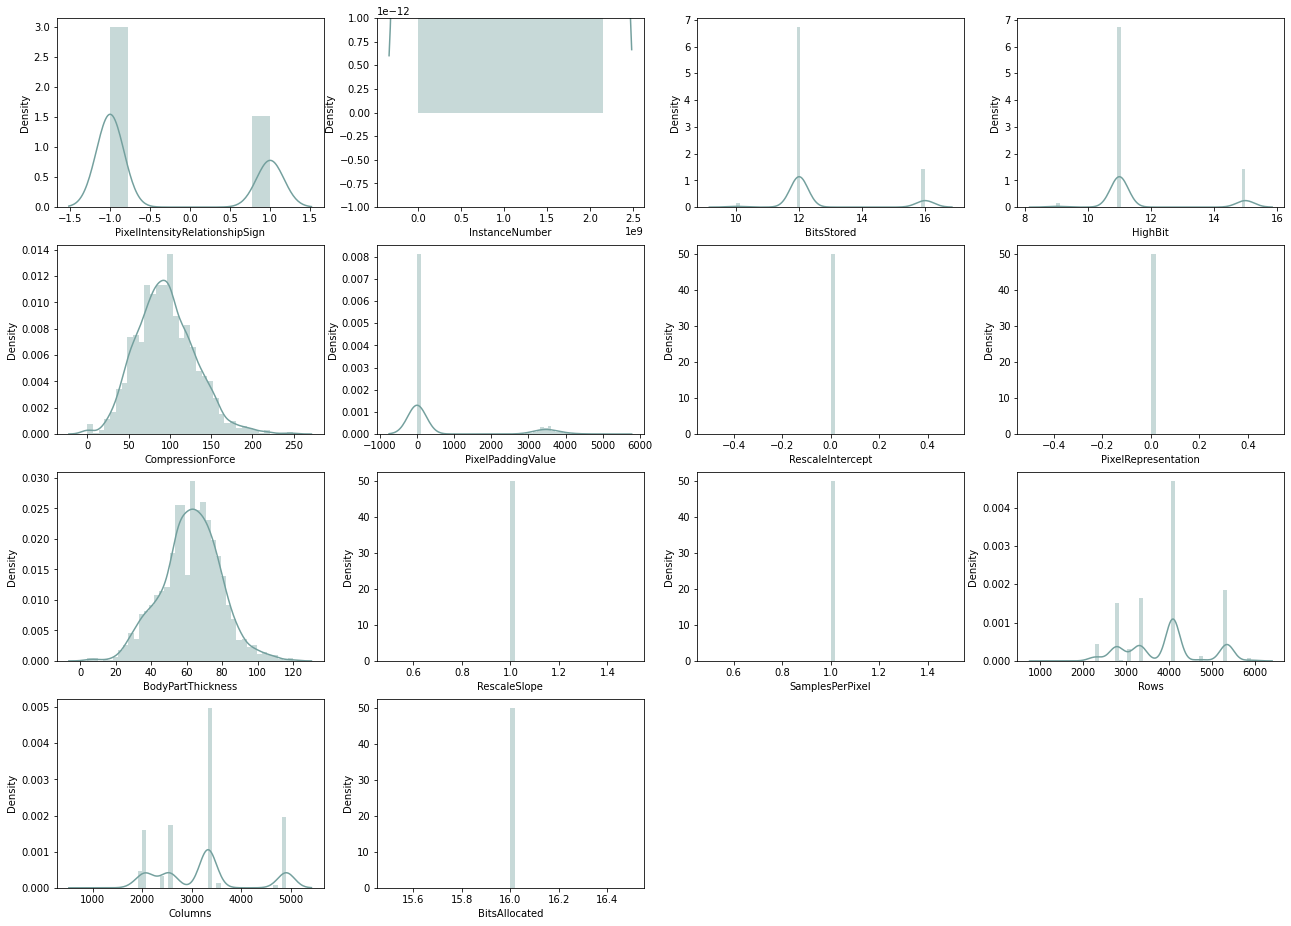

In [ ]:
print('Photometric Interpretation: {}'.format(dfmeta['PhotometricInterpretation'].unique()))
print('VOILUTFunction: {}\n'.format(dfmeta['VOILUTFunction'].unique()))

plt.figure(figsize=(22,16))
for i, col in enumerate(dfmeta.select_dtypes([int, float]).columns):
    plt.subplot(4,4, i+1)
    sns.distplot(dfmeta[col], color = custom_colors[0])

In [ ]:
dfmeta[['Rows','Columns']].describe().T.style.background_gradient(cmap='GnBu_r')

,count,mean,std,min,25%,50%,75%,max
Rows,5000.000000,3924.098200,882.515319,1236.000000,3328.000000,4096.000000,4096.000000,5928.000000
Columns,5000.000000,3233.682600,927.864381,1022.000000,2560.000000,3328.000000,3328.000000,4915.000000


In [ ]:
dfmeta[['CompressionForce','BodyPartThickness']].describe().T.style.background_gradient(cmap='GnBu_r')

,count,mean,std,min,25%,50%,75%,max
CompressionForce,2546.000000,95.180632,35.727875,0.000000,70.000000,92.967380,118.322100,249.099200
BodyPartThickness,2534.000000,62.472731,16.606019,4.000000,53.000000,63.000000,73.000000,120.000000


- 크기와 해상도가 다른 이미지를 가지고 있습니다.
- Photometric Interpretation은 MONOCHROME1과 MONOCHROME2로 설정이됩니다.
- VOILUTFunction은 SIGMOID, LINEAR값이 있습니다.
- 데이터 세트에는 압축된 픽셀 데이터가 포함되어 있습니다.
- pydicom은 압축되지 않은 픽셀 데이터만 처리할 수 있지만 라이브러리를 설치하면 다양한 압축을 처리 할 수 있습니다.
[라이브러리](https://pydicom.github.io/pydicom/stable/old/image_data_handlers.html#supported-transfer-syntaxes)
- BodyParThickness는 노출 중에 압축이 적용된 경우 압축 시 검사한 신체 부위의 평균 두께(mm)를 의미합니다

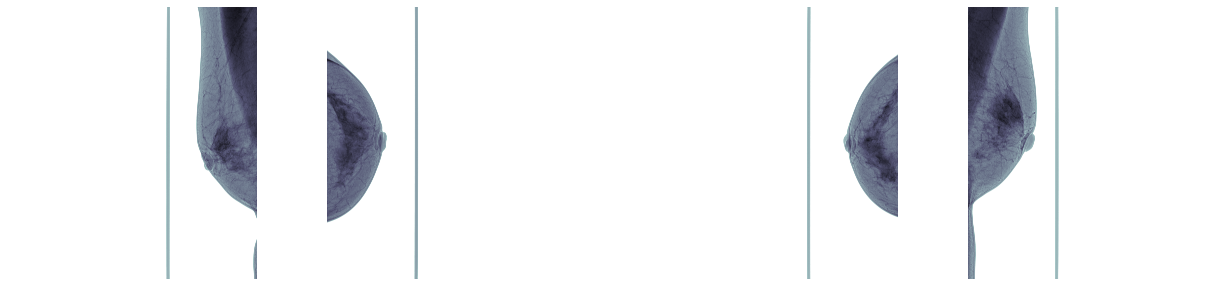

In [ ]:
dcm_path = '/content/drive/MyDrive/파이널 프로젝트/data1/train_images/'

def patient_images(p_id):
  figure = plt.figure(figsize = (22,5))
  for i,file in enumerate(listdir(dcm_path + str(p_id) + '/')):
    plt.subplot(1,4,i+1)
    dataset = pydicom.dcmread(dcm_path + str(p_id) + '/' + file)
    plt.imshow(dataset.pixel_array, cmap=plt.cm.bone)
    plt.axis('off')

patient_images(train['patient_id'].unique()[0])


There are 2 different hospitals in the dataset.



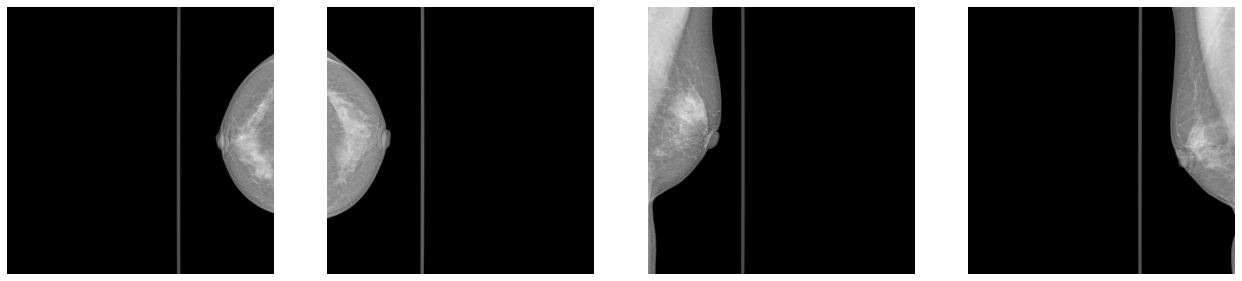

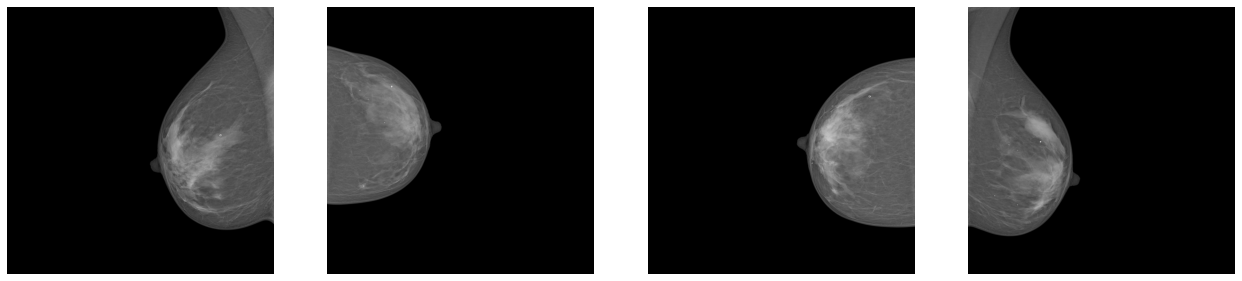

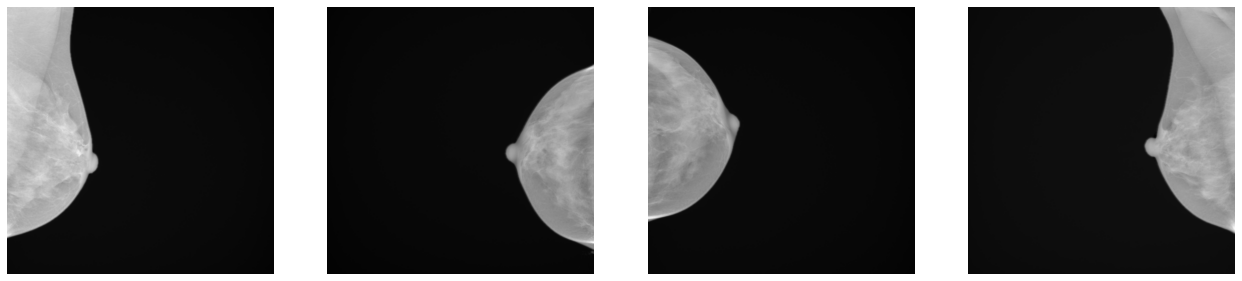

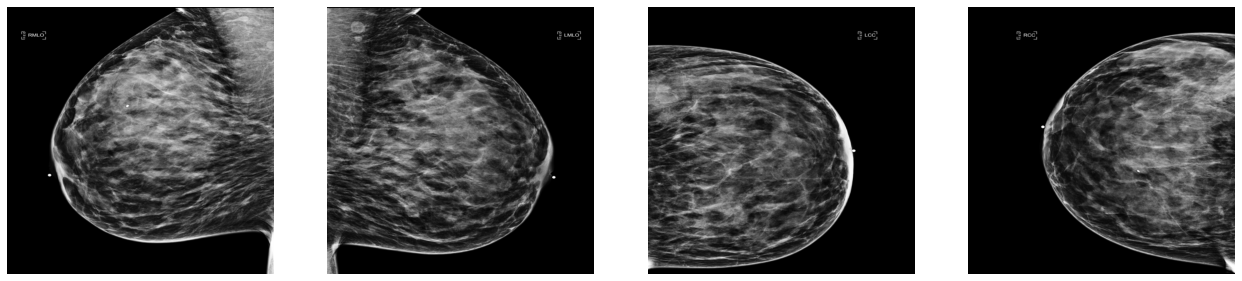

In [ ]:
#dcm_path = "/content/drive/MyDrive/파이널 프로젝트/data1/train_images/"
png_path = '/content/drive/MyDrive/파이널 프로젝트/train_images_processed_512/'

def images_site(site_id):
    ids = train[train.site_id == site_id]['patient_id'].unique()
    for i, id_ in enumerate(ids[[0,3]]):
        patient_path = png_path + str(id_) +'/'
        fig = plt.figure(figsize = (22,5))
        for j, file in enumerate(listdir(patient_path)):
            plt.subplot(1, 4, j+1)
            dataset = cv2.imread(patient_path + file)
            p = plt.imshow(dataset, cmap=plt.cm.bone)
            plt.axis('off');

print('There are {} different hospitals in the dataset.\n'.format(len(train.site_id.unique())))            
for val in train.site_id.unique(): 
    images_site(val)

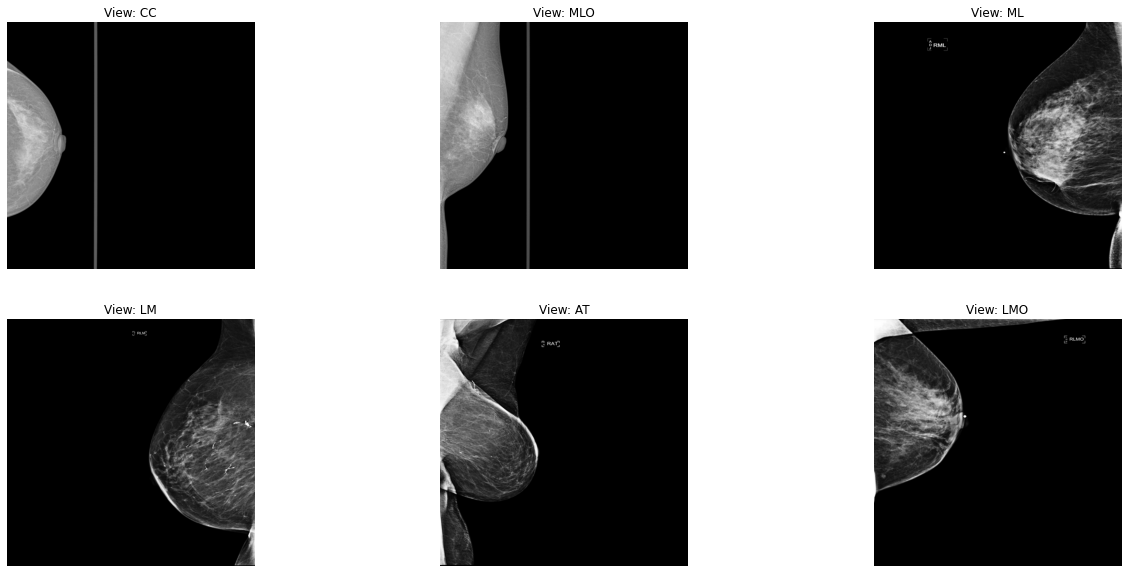

In [ ]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (22,10))
for i, val in enumerate(train.view.unique()):
    ids = train[train.view == val]['patient_id'].unique()
    image_id = train[(train.patient_id == ids[0]) & (train.view == val)]['image_id']
    img_id = png_path + str(ids[0]) + '/' + str(image_id.values[0]) + '.png'
    dataset = cv2.imread(img_id)
    axes[i // 3, i % 3].imshow(dataset, cmap=plt.cm.bone)
    axes[i // 3, i % 3].axis('off')
    axes[i // 3, i % 3].set_title('View: {}'.format(val))

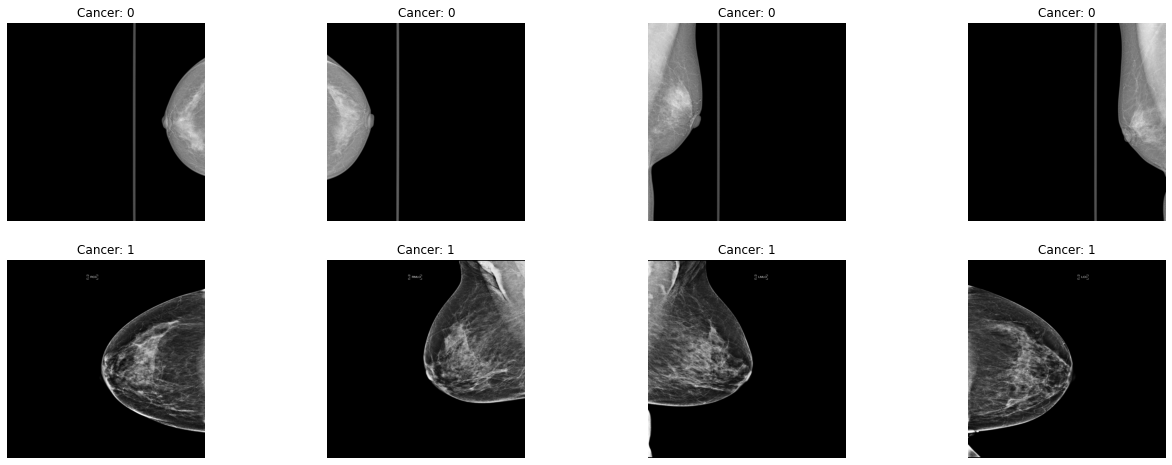

In [ ]:
fig, axes = plt.subplots(nrows = 2, ncols = 4, figsize = (22,8))
for i, val in enumerate(train.cancer.unique()):
    ids = train[train.cancer == val]['patient_id'].unique()
    patient_path = png_path + str(ids[i]) +'/'
    for j, file in enumerate(listdir(patient_path)[:4]): 
        dataset = cv2.imread(patient_path + file)
        axes[i,j].imshow(dataset, cmap=plt.cm.bone)
        axes[i,j].axis('off')
        axes[i,j].set_title('Cancer: {}'.format(val))

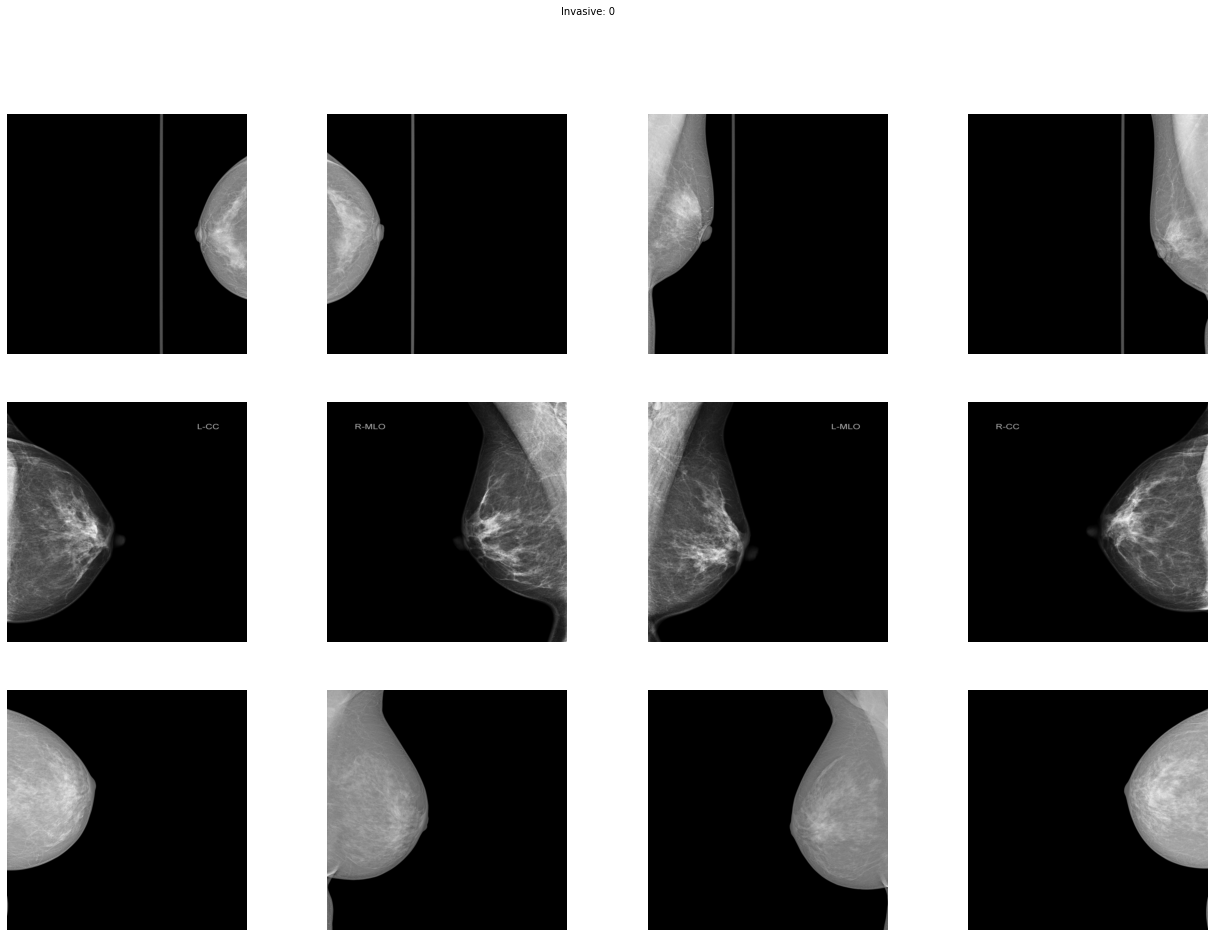

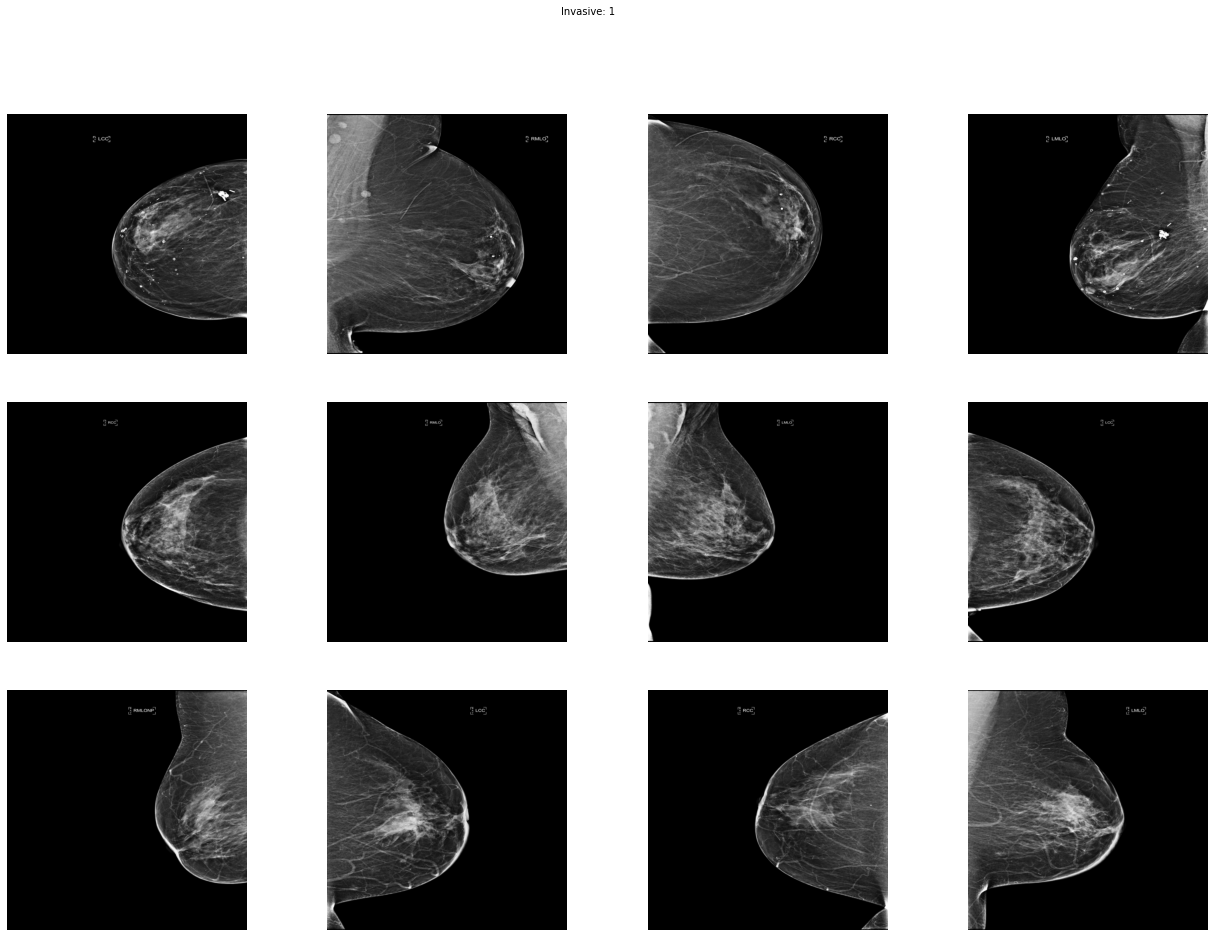

In [ ]:
def invasive_images(val): 
    fig, axes = plt.subplots(nrows = 3, ncols = 4, figsize = (22,15))
    fig.suptitle('Invasive: {}'.format(val), fontsize = 10)
    ids = train[train.invasive == val]['patient_id'].unique()
    for i in range(3): 
        patient_path = png_path + str(ids[i]) +'/'
        for j, file in enumerate(listdir(patient_path)[:4]): 
            dataset = cv2.imread(patient_path + file)
            axes[i,j].imshow(dataset, cmap=plt.cm.bone)
            axes[i,j].axis('off')
        
for val in train.invasive.unique():
    invasive_images(val)

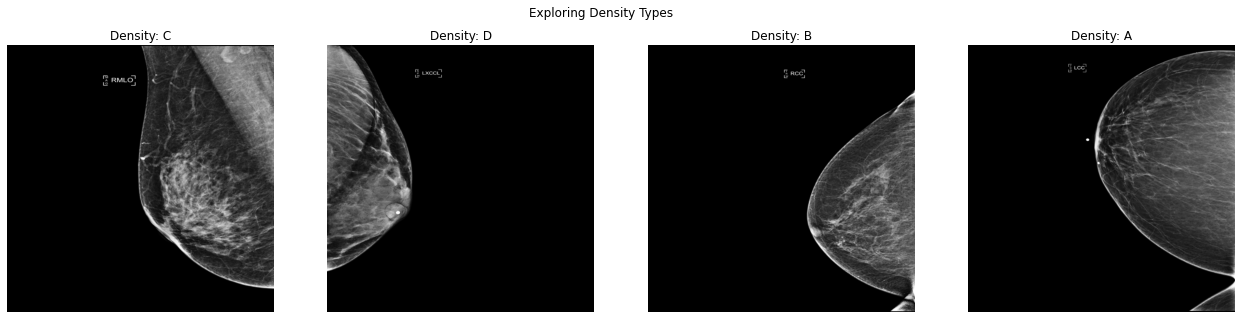

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols = 4, figsize = (22,5))
fig.suptitle('Exploring Density Types', fontsize = 12)
for i, val in enumerate(train.density.unique()[1:]):
    ids = train[train.density == val]['patient_id'].unique()
    patient_path = png_path + str(ids[9]) +'/'
    for j, file in enumerate([listdir(patient_path)[0]]): 
        dataset = cv2.imread(patient_path + file)
        axes[i].imshow(dataset, cmap=plt.cm.bone)
        axes[i].axis('off')
        axes[i].set_title('Density: {}'.format(val))